---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: true
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

## Introduction

Unsupervised Learning is a type of machine learning that analyzes data in the absence of labels. Unsupervised learning involves clustering and dimensionality reduction, both used to discover patterns and insights in the data not seen before. 

# Dimensionality Reduction

Dimensionality Reduction refers to the method of reducing the amount of features in a dataset. There are many issues when visualizing data with multiple features, as it is difficult to visualize the amount of dimensions in an understandable way. Dimensional Reduction reduces the number of features down, while taking into account the most amount of variance.

## PCA

Principal Component Analysis, known as PCA is the most commonly used dimensionality reduction technique, and involves transforming the data points into new calculated variables named “Principal Components”. Each component is comprised of linear combinations of the original feature, and captures the direction of maximum variance. When plotting the top two Principal Components, we essentially are able to use two features that take into account the majority of explained variance for the dataset. 


Column Types:
District_Name                                object
Total_Population                            float64
Log_African_American                        float64
White                                       float64
Log_Asian                                   float64
Veterans                                    float64
Nonveterans                                 float64
Below_Poverty_Level                         float64
Log_Median_Household_Income                 float64
High_School_Graduate                        float64
Bachelors_Degree_or_Higher                  float64
Households_with_Computers                   float64
Households_with_Internet                    float64
Log_American_Indian_and_Alaska_Native       float64
Log_Native_Hawaiian_and_Pacific_Islander    float64
Median_Age                                  float64
state                                        object
Congressional_District                       object
state_abbreviation                           objec

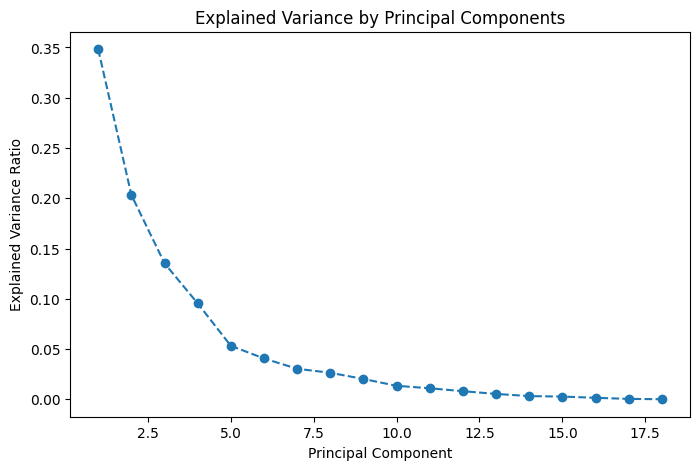

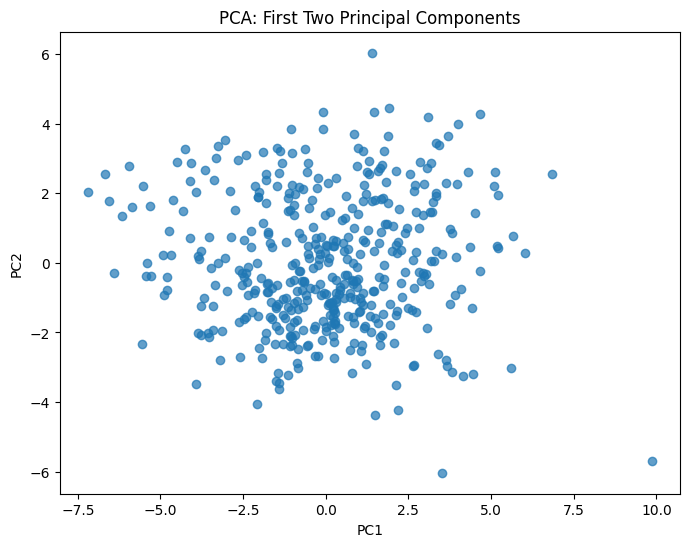

In [1]:
import pandas as pd
import numpy as np
merged_standard_log_df = pd.read_csv('../../data/processed-data/merged_standard_log.csv') 

merged_standard_log_df['Congressional_District'] = merged_standard_log_df['Congressional_District'].astype(str)

print("Column Types:")
print(merged_standard_log_df.dtypes)

numerical_columns = merged_standard_log_df.select_dtypes(include=['float64', 'int64']).columns

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA()

# Fit and transform with PCA
numerical_data = merged_standard_log_df[numerical_columns]

pca_result = pca.fit_transform(numerical_data)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


# Visualize first two components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [2]:
loadings = pd.DataFrame(pca.components_, columns=numerical_columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print(loadings.head())

     Total_Population  Log_African_American     White  Log_Asian  Veterans  \
PC1          0.221261             -0.077622  0.180383   0.135435  0.129197   
PC2          0.003581              0.071083 -0.307170   0.436838 -0.371627   
PC3          0.454383              0.309031 -0.118751   0.053967  0.050890   
PC4          0.078886             -0.503244  0.247943   0.003214  0.166664   
PC5         -0.202893              0.410686 -0.420307   0.062545  0.413256   

     Nonveterans  Below_Poverty_Level  Log_Median_Household_Income  \
PC1     0.250760            -0.247778                     0.248968   
PC2     0.105086            -0.097141                     0.315748   
PC3     0.358875             0.409264                    -0.219878   
PC4    -0.119718            -0.047839                     0.030063   
PC5    -0.340224            -0.057707                    -0.032332   

     High_School_Graduate  Bachelors_Degree_or_Higher  \
PC1             -0.099454                    0.325701

Feature loadings are analyzed to understand the driving factors behind each Principal Component. Each feature loading is the weight of the original variables contribution in the PCA. 

This revealed that PC1 was positively correlated with Total Population, Median Household Income, Nonveterans, Bachelors Degree or Higher, and slightly correlated with White. PC1 was also negatively correlated with Below Poverty Level and slightly negatively correlated with High School Graduate. This indicates that PC1s with higher values are those with a higher total population, higher median household income, more degree of whites etc. 

PC2 was positively correlated with Asian, Median Household Income and Bachelors Degree or Higher, while negatively correlated with Veterans, White, and High School Graduate. PC1’s components of  higher education, income, and population size link it to higher voting rate, while PC2’s components of Asian, Veterans, and White reflect a more Cultural and Socioeconomic Difference rather than voting. 



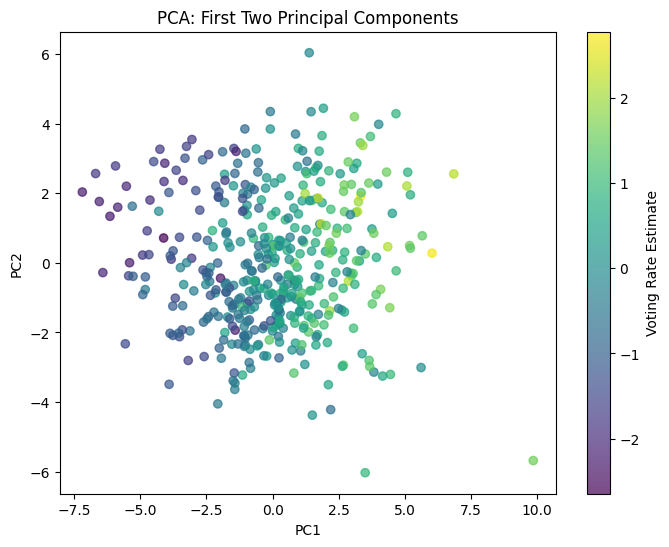

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=merged_standard_log_df['voting_rate_estimate'], cmap='viridis', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Voting Rate Estimate')
plt.show()

When we color our plot by voting rate estimate, however, we can see that PC1 is correlated with a higher voting rate. Values with a higher voting rate are clustered in the positive PC1 direction. PC2 does not seem to have an effect on voting rate estimate. 
### PCA Correlation

In [4]:
pc_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pc_df['voting_rate_estimate'] = merged_standard_log_df['voting_rate_estimate']
correlations = pc_df.corr()
print(correlations['voting_rate_estimate'].sort_values(ascending=False))

voting_rate_estimate    1.000000
PC1                     0.789800
PC9                     0.287184
PC5                     0.118478
PC8                     0.116832
PC11                    0.078606
PC7                     0.049434
PC15                    0.013838
PC14                    0.011249
PC16                    0.008906
PC17                    0.005504
PC2                     0.004660
PC10                   -0.004199
PC4                    -0.026708
PC18                   -0.031082
PC13                   -0.041294
PC12                   -0.091670
PC6                    -0.292916
PC3                    -0.399221
Name: voting_rate_estimate, dtype: float64


Analyzing Voting Rate correlalation, we see that that PC1 is positively correlated with voting rate, achieving a score of 0.789, while PC2 only had a score of 0.0046. 



## T-SNE

T-SNE is another dimensionality reduction method technique that transforms high dimensional data into lower 2D or 3D space. T-SNE first calculates the pairwise similarities between all data points in higher dimensional space. 

This is done by utilizing a Gaussian distribution, calculating the probability that two points are similar. In reduced space, pairpise similarities are also computed, but using a Student-t distribution. 

 t-SNE’s goal is to minimzie the KL-Divergence(the measure of dissimimilarity between two distributions) between the high dimensional and low dimensional representations. 

An important parameter of t-SNE is perplexity, influencing how local and global structures are represented in the dimensionality reduction. A low perplexity value puts more focus on retaining local structures, retaining local relationships, while a higher performance value puts more attention in the global structure, and may mean focusing on more distant value to preserve global structure. 


Plotting t-SNE with varying levels of Perplexity values to understand the impact and importance of the Perplexity value.

 A perplexity score of 5 is plotted first, and showcases tightly clustered datapoints, representing locally maintained structure. 
 
 A perplexity score of 30 is then plotted, showcasing more a spread out distribution of datapoints, but clusters are still visible. This represents a value that emphasizes both local and global structures, and normally the default when plotting.
 
 Finally, a perplexity score of 50 is plotted, emphasizing global structure. This showcases a distribution similar to the perplexity score of 30, but with less visible structures. 

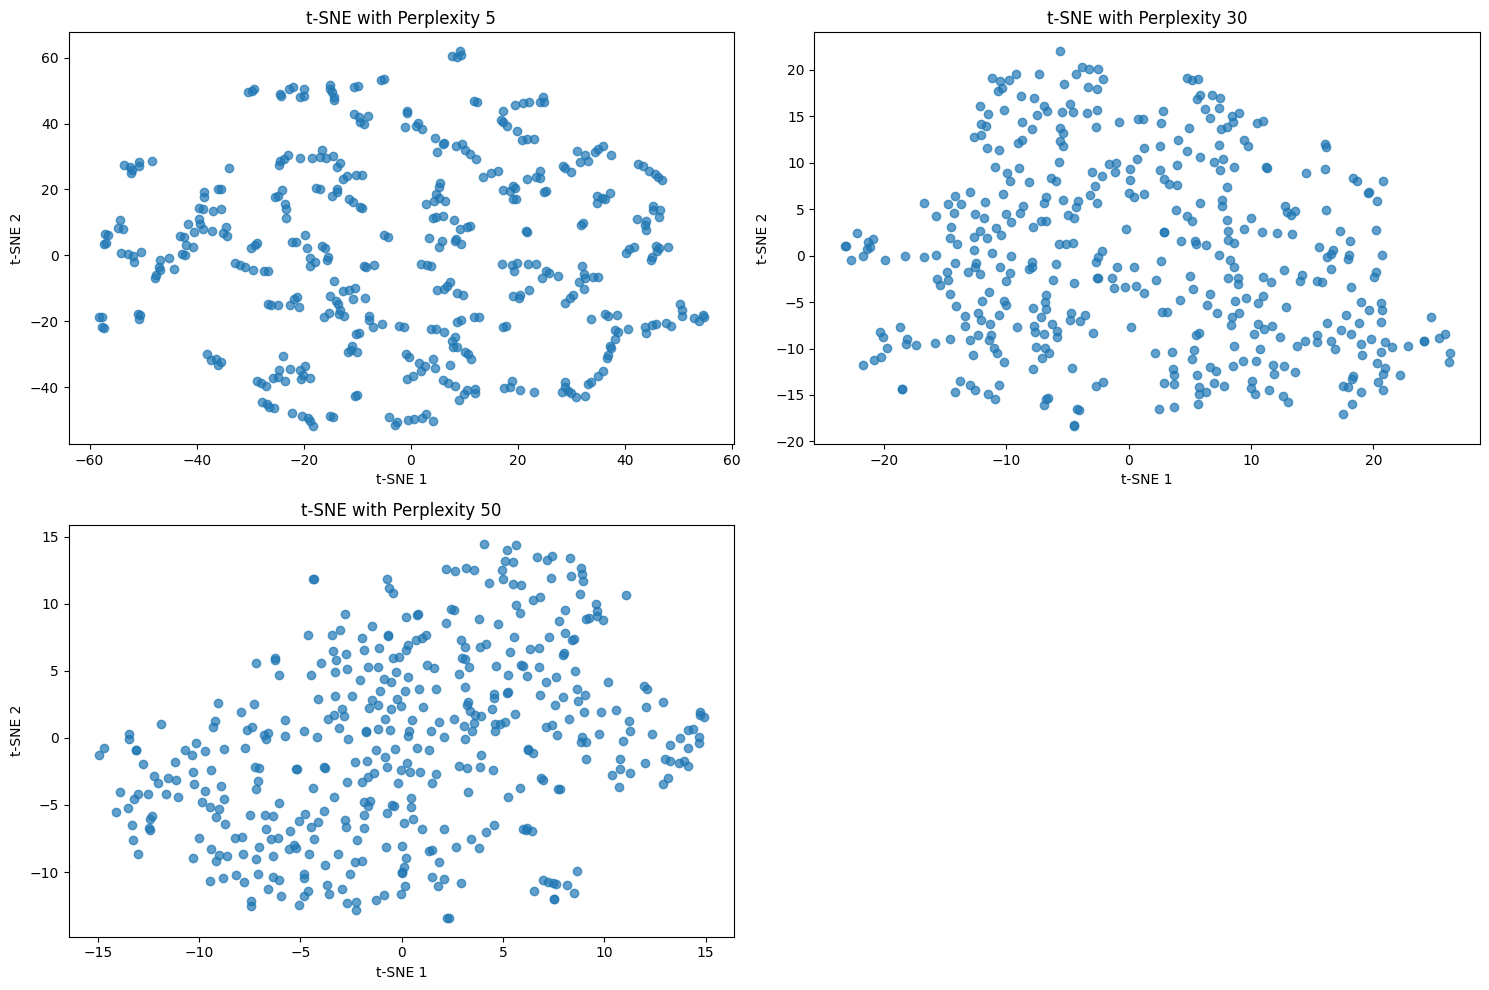

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare the standardized numerical data for t-SNE
numerical_data_for_tsne = merged_standard_log_df[numerical_columns]

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(numerical_data_for_tsne)
    tsne_results[perplexity] = tsne_result

# Plot t-SNE results for different perplexity values
plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities, 1):
    plt.subplot(2, 2, i)
    plt.scatter(tsne_results[perplexity][:, 0], tsne_results[perplexity][:, 1], alpha=0.7)
    plt.title(f't-SNE with Perplexity {perplexity}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

Plotting the t-SNE results with voting rate estimate, we see that regardless of perplexity score, each plot displays the  pattern of grouping similar voting rates together. 

With a perplexity of 5, small clusters are made up of similar voting rates, with some containing mixes. 

A perplexity score of 30, despite having fewer distinct clusters, showcases gradient color pattern, splitting the data into regions of higher and lower voting rates. 

A similar pattern is observed in a perplexity score of 50, with a much smoother and distinct gradient separating the difference in voting rates. A perplexity of 30 was selected for further analysis due to its balance of preserving both local and global structures. 

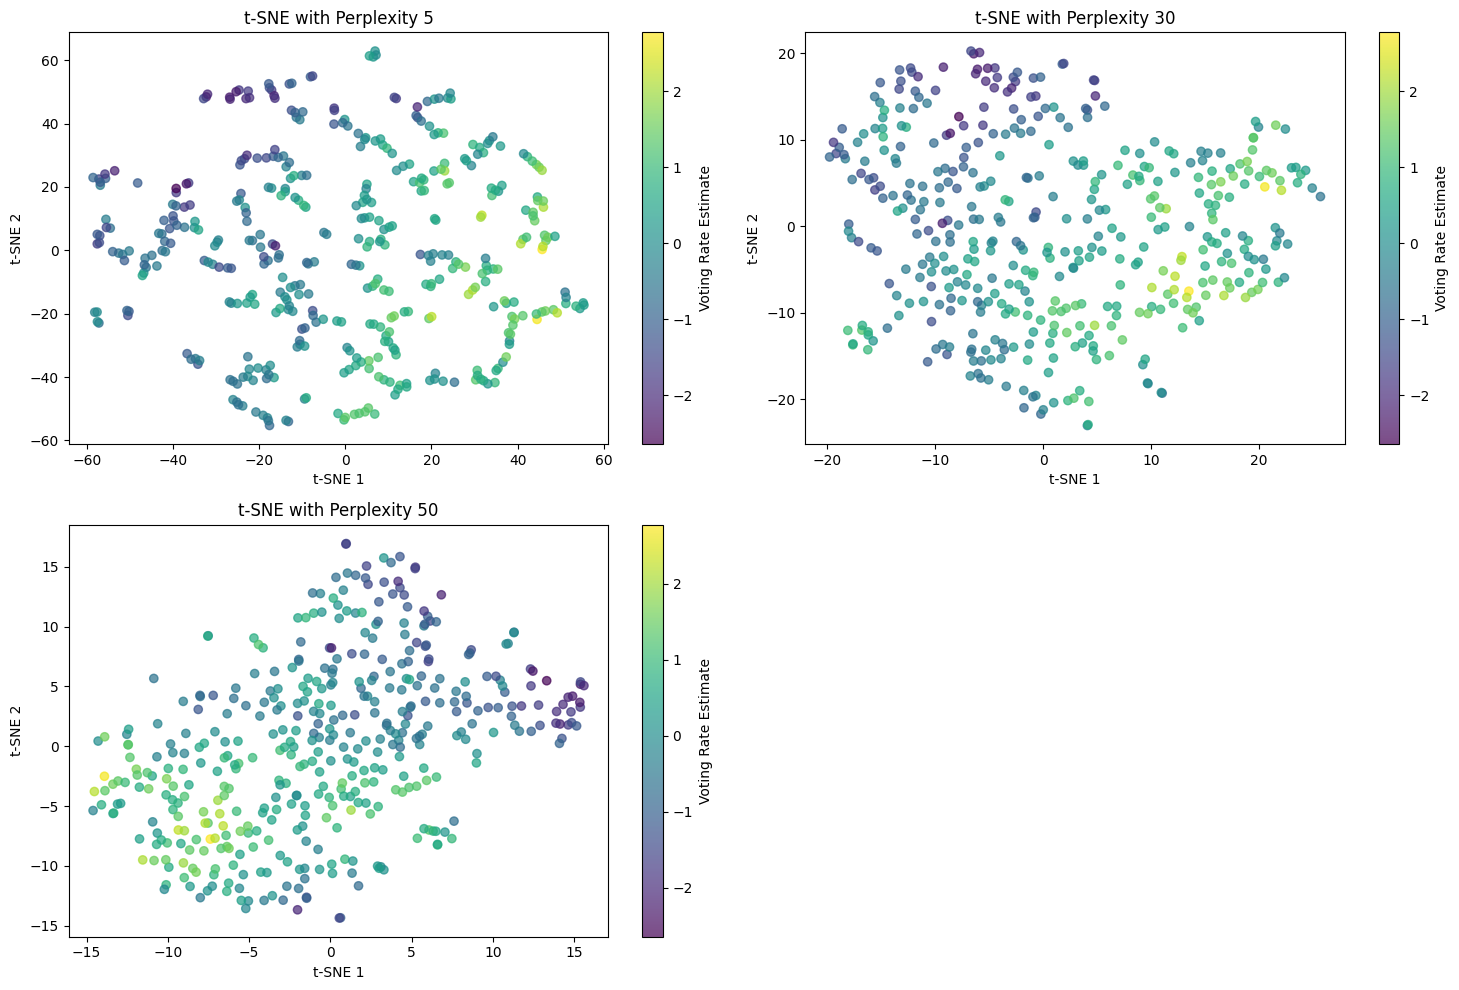

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Prepare the standardized numerical data for t-SNE
numerical_data_for_tsne = merged_standard_log_df[numerical_columns]
voting_rate = merged_standard_log_df['voting_rate_estimate']  # Your key feature

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(numerical_data_for_tsne)
    tsne_results[perplexity] = tsne_result

# Plot t-SNE results with contextual overlay for different perplexity values
plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities, 1):
    plt.subplot(2, 2, i)
    scatter = plt.scatter(tsne_results[perplexity][:, 0], 
                          tsne_results[perplexity][:, 1], 
                          c=voting_rate, cmap='viridis', alpha=0.7)
    plt.title(f't-SNE with Perplexity {perplexity}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar(scatter, label='Voting Rate Estimate')  # Add a colorbar to show voting rate

plt.tight_layout()
plt.show()

# Effectiveness of PCA and t-SNE in preserving data structure

## PCA
PCA preserves global structures by maximizing variance utilizing the principal components. PCA may have issues with identifying local structures, however, if the PCA does not captures the variance within these clusters. 

## t-SNE
t-SNE is very good at maintaining local structures, making sure similar points stay together in the dimensionality reduction. t-SNE may have a harder time preserving global structures however, with farther distances in lower dimensional space plot not indicating true distances in higher dimensional space.

---

# Vizualizaion with PCA and t-SNE

## PCA
PCA is very good for visualizing data as it transforms data with many features into just 2, while capturing the majority of the variance. It provides a global broad view of the pattern of data, however has difficulty providing insight into local clusters and patterns for voting rates.

## t-SNE
t-SNE also provides a clear visual representation of the data in reduced dimensional space, however emphasizes local structure more, and may have a harder time visualizing global structures. t-SNE’s axes, t-SNE 1 and t-SNE 2 also lack definition, making it difficult intepretnt compared to PCA.

---

# Comparing PCA and t-SNE tradeoffs

## PCA
**Strengths:**
- Reducing dimensionaly while preserving a large amount of variance and information.
- Very good at preserving global structure, making it optimal for identifying trends and patterns.
- Very good at handling data with linear relationships.

**Weaknesses:**
- Not very good at preserving local clusters and patterns if they have minimal contribution to variance.
- Not good with handling data with non-linear relationships.

**Use case:** Main goal is to reduce dimensions while preserving information, not as interesting clustering or finding local patterns.

## t-SNE
**Strengths:**
- Optimal for preserving local structures, identifying local clusters and relationships.
- Good for identifying hidden patterns utilzing non-linear relationships.

**Weaknesses:**
- Not as good at preserving global structures and identifying global trends and patterns.
- Due to lack of defined axes, results are confusing to interpret.

**Use case:** Main goal is for data exploration, finding local clusters and hidden patterns.

---

# PCA vs t-SNE Results Analysis

The results and computations of PCA and t-SNE provides two different insights into our data. 

## PCA Results
The PCA results shows a uniform distribution of data points across our data space, not showing many clusters. Analysis tells us that PC1 is strongly correlated with voting rate estimate, linking it with factors such as median income and university education. The PCA does not showcase much patterns or clusters, reinforcing the idea that it is best used to identify global trends and patterns. In this case, it shows us that areas with higher income and education tend to have higher voter turnout.

## t-SNE Results
The t-SNE result using perplexity of 30 shows a plot with distinct clusters, and after coloring with voting rate estimate, reveals a separation between high and low voting rates. This helps reveal sub-groups in our data, revealing patterns that are non-linear and not obvious. However, due to the axes of t-SNE not actually meaning anything, the clusters formed can only provide hints into relationships, not providing any actionable information.

---

## Conclusion
Utilizing these two methods together provides insight into what drives the trends and patterns (through PCA) and where the trends and patterns are grouped together.




# Clustering

The three types of clustering done on the data are K-means, DBSCAN, and Heirarchial. K-Means clustering is a very important and widely used technique to cluster data points utiliing the Euclidian Distance. Euclidean Distance, known as the straight line distance is the default distance metric used in machine learning. 

---

## K-means

The K-Means algorithm utilizes the `n_clusters` parameter, a user-defined parameter indicating the number of centroids, or clusters one wishes the algorithm to use. The way K-means works involves randomly placing these centroids in the data space, and then utilizing Euclidean distance, assigns the closest data point to each centroid.

This creates the first set of clusters. In the next iteration, the mean of each cluster is set as the new centroid, and the new closest set of points are assigned to this new cluster. This algorithm continues until the clusters stabilize and converge. The goal of K-means clustering is to minimize the sum of square distances between centroid and it’s datapoints.

---

## DBSCAN

DBSCAN, short for “Density-Based Spatial Clustering of Applications with Noise,” is another clustering method, but unlike K-means, groups data points based on density rather than distance. DBSCAN is very good at identifying clusters of all shapes in comparison to K-means, and also does not need the user to specify the number of clusters, as it dynamically finds this based on data density.

DBSCAN takes in two important user-defined parameters, `EPS` (epsilon) and `Minpoints`. `EPS` dictates the maximum distance between two data points for them to be classified as part of the same cluster. `Minpoints` defines the minimum number of points needed for data points to be classified as a cluster. Similar to K-Means, the distance metric is Euclidean Distance.

The algorithm starts with an unvisited point, finds all points within the `EPS`, and if it reaches the threshold of `Minpoints`, becomes a cluster. The algorithm then expands, finding more points and clusters, repeating till no further points can be added.

---

## Hierarchical Clustering

Hierarchical Clustering is a type of clustering that involves a hierarchy of clusters. There are two types of Hierarchical clustering techniques: **Agglomerative (Bottom-Up)** and **Divisive (Top-Down)**.

- **Agglomerative Clustering** starts off with all data points as its own cluster. The distances between these data points are calculated, and then grouped together based on the linkage criteria chosen.  
- **Divisive Clustering** follows a similar pattern, but with a top-down approach. The data points start off as one big cluster, and continually get split based on linkage criteria until each data point is its own cluster.
  - **Linkage** is the method used to measure distances between data points in hierarchical clustering.  
  - Types of Linkage:
    - **Single Linkage**: Closest distance between two points.
    - **Complete Linkage**: Maximal distance between points.
    - **Average Linkage**: Average distance between all points in a cluster.
    - **Ward Linkage**: Measures the amount of variance within a cluster.

We will be using **Ward Linkage** for its minimization of variation within clusters and its practicality. After the first initial cluster is set, the distances are once again computed between clusters, and are continually merged until there is only 1 cluster left.


Hierarchical clustering creates a **dendrogram**, a tree-like structure, providing information on how clusters merge and split.

---

## Hyperparameter Optimization

To maximize the use of these algorithms, we utilize a hyperparameter called **Silhouette Score**. Silhouette score is the metric used to validate the quality of a cluster, comparing how well each data point is with its own cluster and other clusters. 

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


- **Formula Explanation**:  
  With `A(i)` being the average distance between the point and other points in its own cluster, and `B(i)` being the average distance between the point and all other points in the next closest cluster. The score is between -1 and 1, with a higher score indicating a more compact, distinct cluster.

---

### Using Silhouette Score for Optimization

- **K-Means**:  
  Use the silhouette score to calculate the optimal number of clusters by plotting the score against `n_clusters`. The optimal number of clusters corresponds to the highest silhouette score.

- **DBSCAN**:  
  Use the silhouette score to calculate the optimal `EPS` parameter. This is done by plotting the silhouette score against `EPS`, and the optimal clusters will correspond to the maximum silhouette score.

- **Hierarchical Clustering**:  
  The silhouette score is evaluated to find the optimal place to "cut" the dendrogram. The number of clusters at which the silhouette score is maximized is used as the cut-off point for the dendrogram.

# K-Means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering, DBSCAN, SpectralClustering

import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
from sklearn.metrics import silhouette_score

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
import sklearn.cluster

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette1(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    
    
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels
             
             

    print("OPTIMAL PARAMETER =",opt_param)
    print("MAXIMUM SILHOUETTE SCORE =", sil_max)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 2
MAXIMUM SILHOUETTE SCORE = 0.18366963443756543


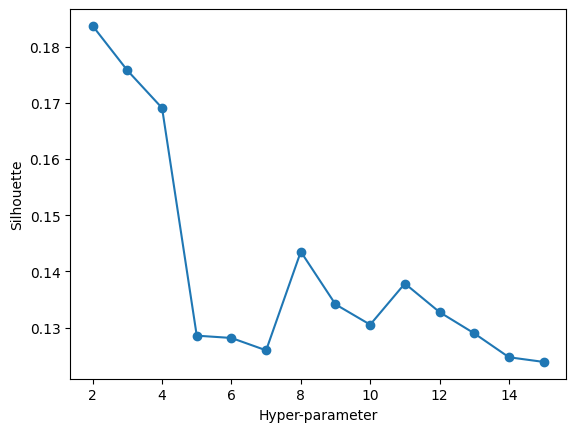

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

opt_labels=maximize_silhouette1(numerical_data,algo="kmeans",nmax=15, i_plot=True)

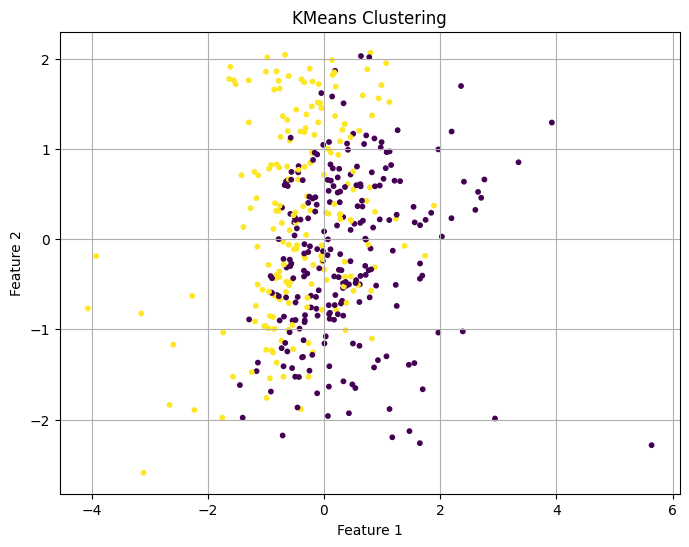

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans_labels = kmeans.fit_predict(numerical_data)
merged_standard_log_df['Kmeans_Label'] = kmeans_labels


plt.figure(figsize=(8, 6))
plt.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

Using the optimal parameter of 2, the k-means clustering is plotted below. The data is separated into two separate distinct clusters. There is a lot of overlap towards the middle, which may indicate kmeans is having trouble cleanly separating the two groups.


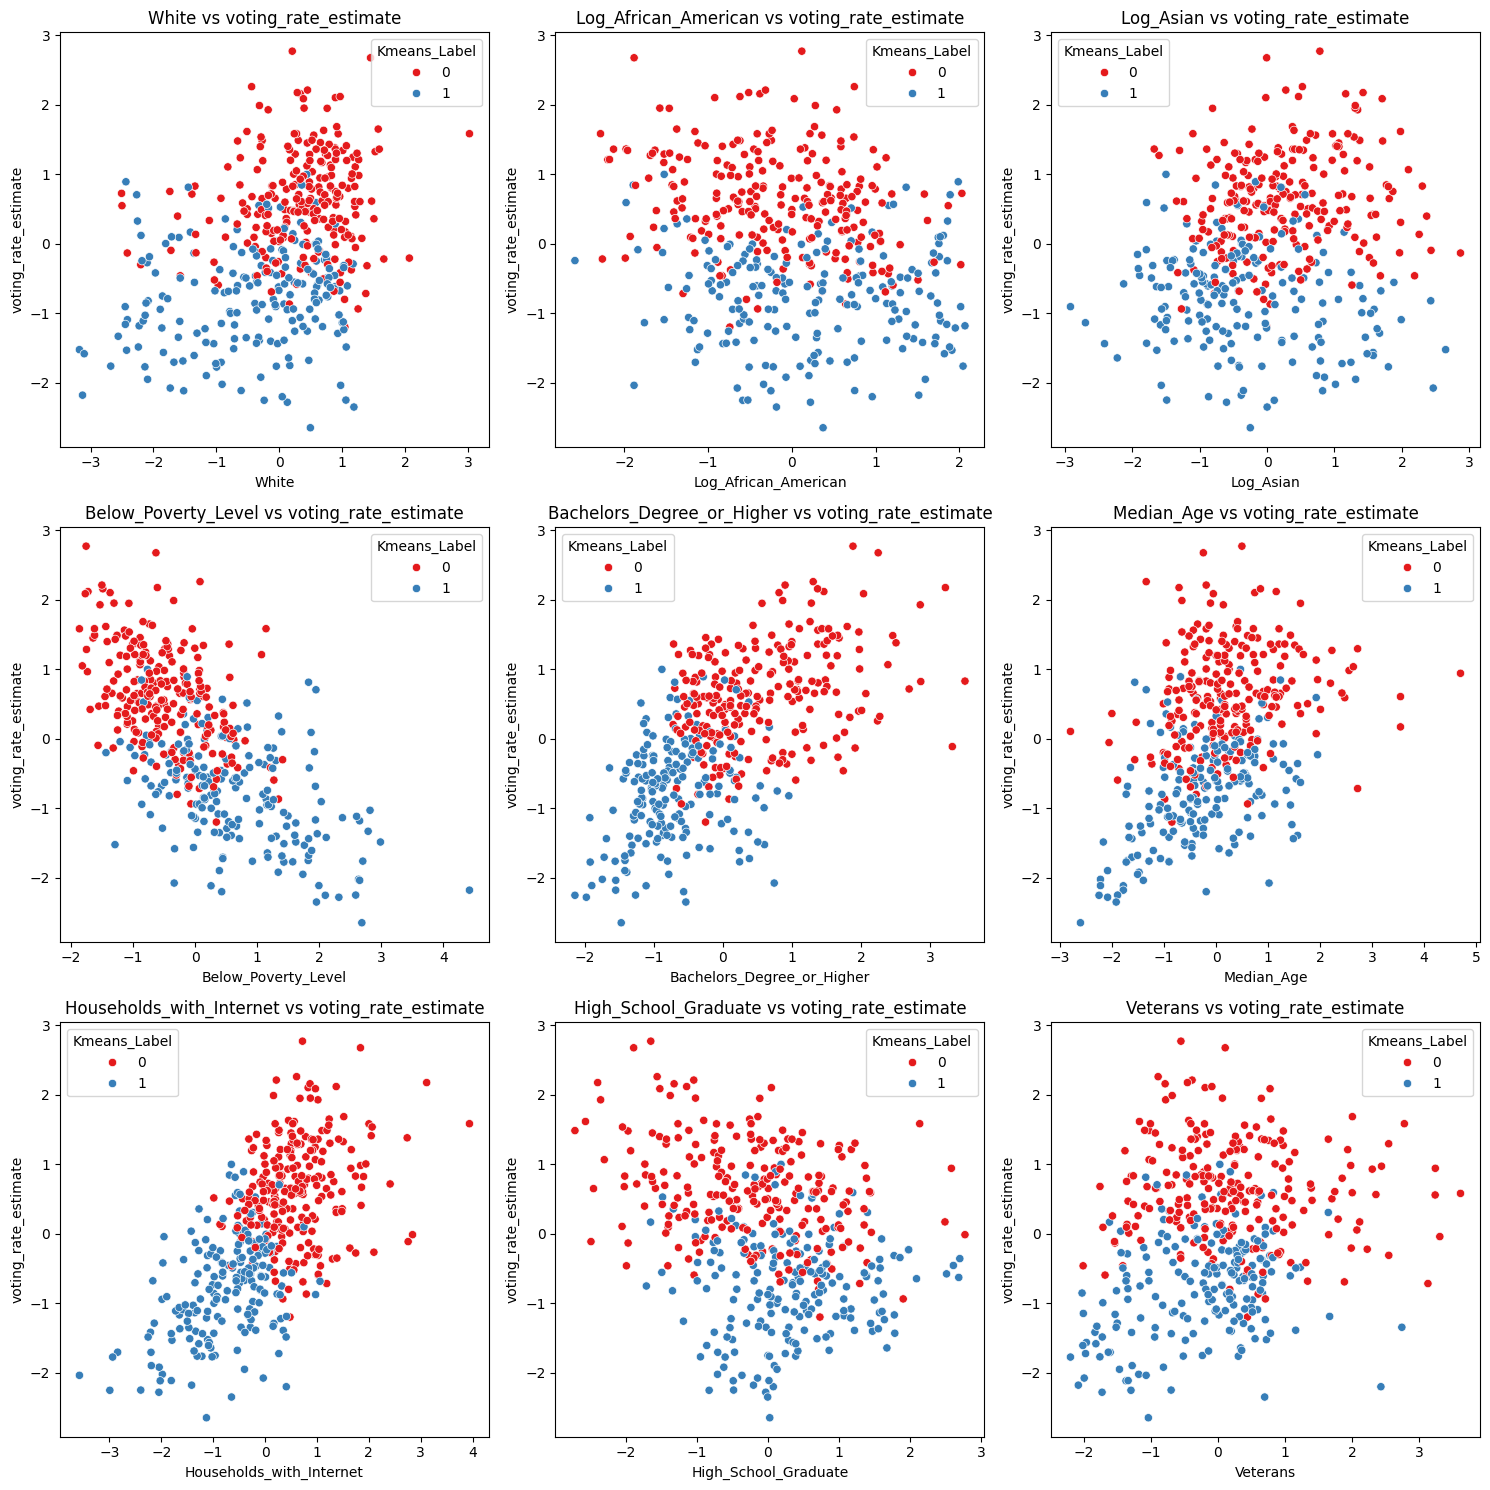

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the y-values for your subplots (now x-values since axes are flipped)
x_values = [
    'White', 'Log_African_American', 'Log_Asian', 'Below_Poverty_Level',
    'Bachelors_Degree_or_Higher', 'Median_Age', 'Households_with_Internet', 'High_School_Graduate', 'Veterans'
]

# Set up the grid dimensions
ncols = 3  # Number of columns in the grid
nrows = (len(x_values) + ncols - 1) // ncols  # Calculate rows based on the number of columns

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate scatter plots for each x-value
for ax, x in zip(axes, x_values):
    sns.scatterplot(
        x=x,
        y='voting_rate_estimate',
        hue='Kmeans_Label',
        data=merged_standard_log_df,
        palette='Set1',
        ax=ax
    )
    ax.set_title(f'{x} vs voting_rate_estimate')
    ax.set_xlabel(x)
    ax.set_ylabel('voting_rate_estimate')

# Turn off any unused subplots
for ax in axes[len(x_values):]:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

When plotting KMeans clusters with specific features and voting rates, distinct patterns emerged:

- **Cluster 0** is associated with **higher voting rates** and higher values for features such as:  
   - **White population**  
   - **Asian population**  
   - **Median Age**  
   - **Bachelor's Degree or Higher**  
   - **Households with Internet**  

- **Cluster 1** is associated with **lower voting rates** and higher values for:  
   - **African American population**  
   - **Below Poverty Level**  

- **No clear correlation** was observed for **Veterans**, maybe slightly correlated with higher voting rates 

This suggests that socioeconomic and demographic factors like education, internet access, and income have a strong relationship with voting rates.


# DBSCAN

OPTIMAL PARAMETER = 5.0
MAXIMUM SILHOUETTE SCORE = 0.5884911578847557


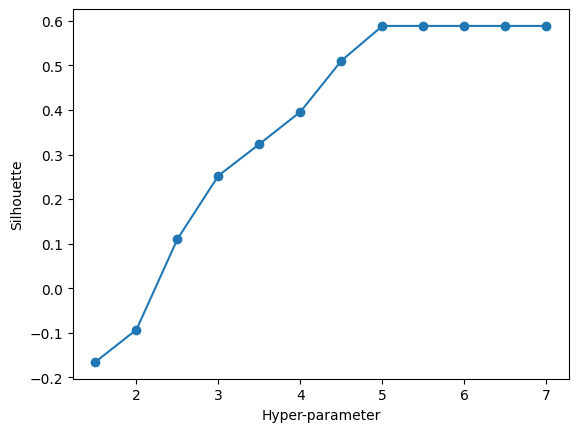

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

opt_labels=maximize_silhouette1(numerical_data,algo="dbscan",nmax=15, i_plot=True)



Using the optimal parameter of 5, we saw that 1 cluster dominated the features space , with 1 other data point being labeled as noise. 

With visual inspection, it was found that EPS scores around 2-3 provided more distinct clusters. With an EPS of 5, this is a large EPS, and may lead to the data being clumped into one large cluster, which is what appears to be. I chose an EPS of 2.5 for further analysis as it provided a good distribution between two clusters.

## DBSCAN With Varied EPS

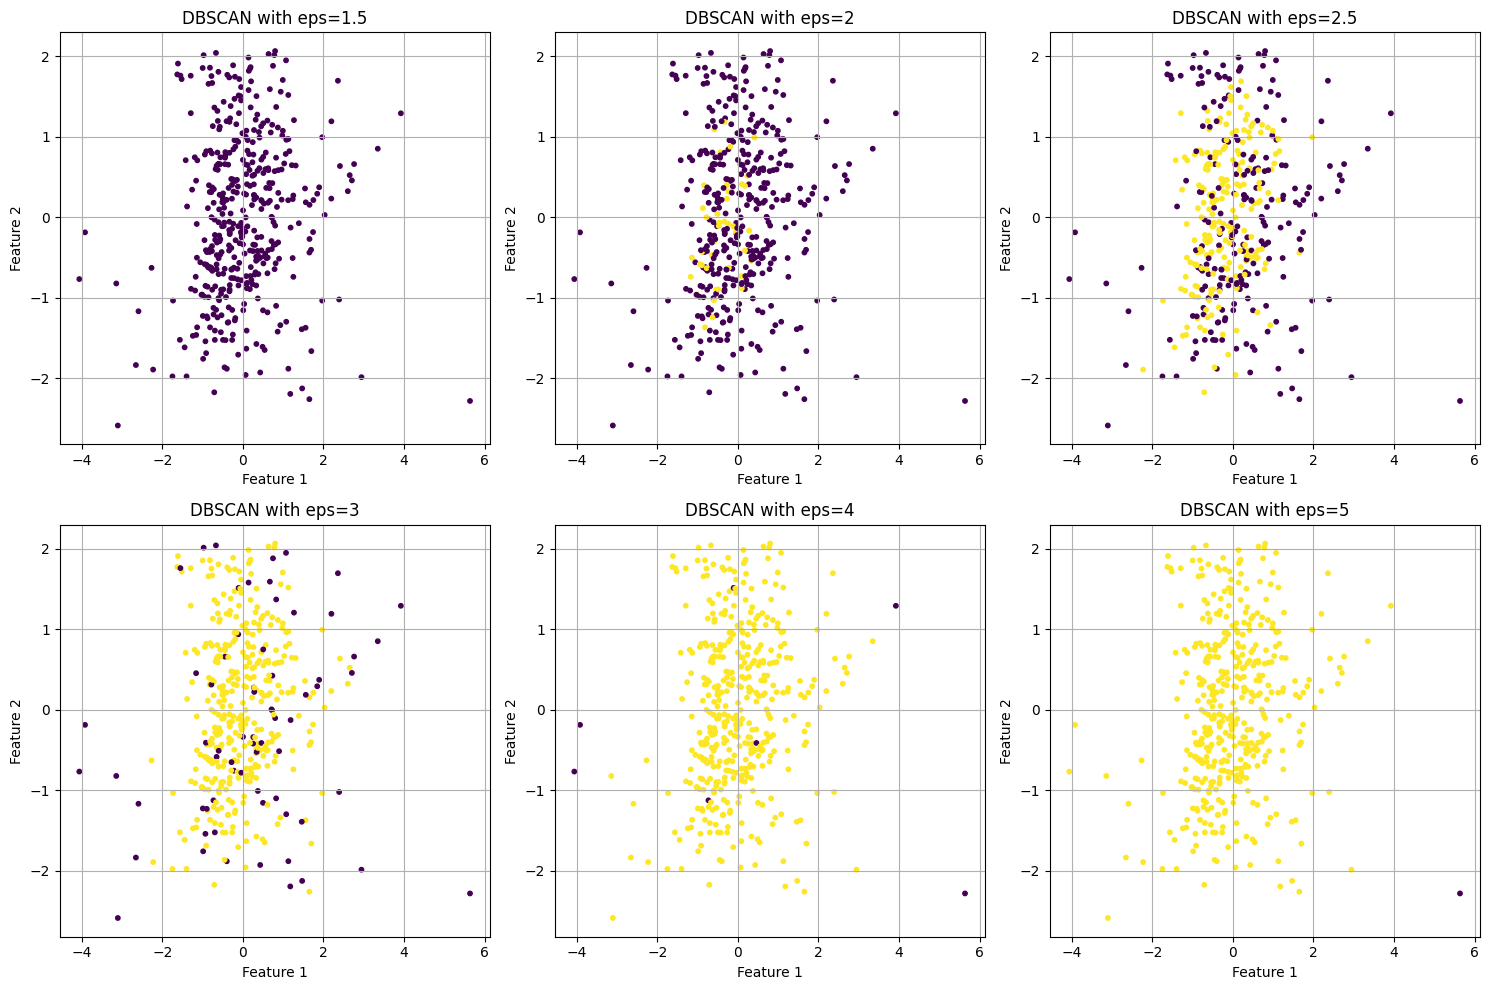

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define the eps values to test
eps_values = [1.5, 2, 2.5, 3, 4, 5]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Apply DBSCAN with different eps values and plot the results
for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=15)
    dbscan_labels = dbscan.fit_predict(numerical_data)
    
    axes[i].scatter(
        numerical_data.iloc[:, 0],
        numerical_data.iloc[:, 1],
        c=dbscan_labels,
        cmap='viridis',
        s=10
    )
    axes[i].set_title(f"DBSCAN with eps={eps}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].grid()

# Adjust layout
plt.tight_layout()
plt.show()


When plotting the DBSCAN clusters with voting rate, it was difficult to make out any clear patterns or trends. Low Voting rate estimates were in the same clusters a high voting rates, and didn’t provide any new insights or information regarding the data

 ## DBSCAN Plotted with Voting Rate

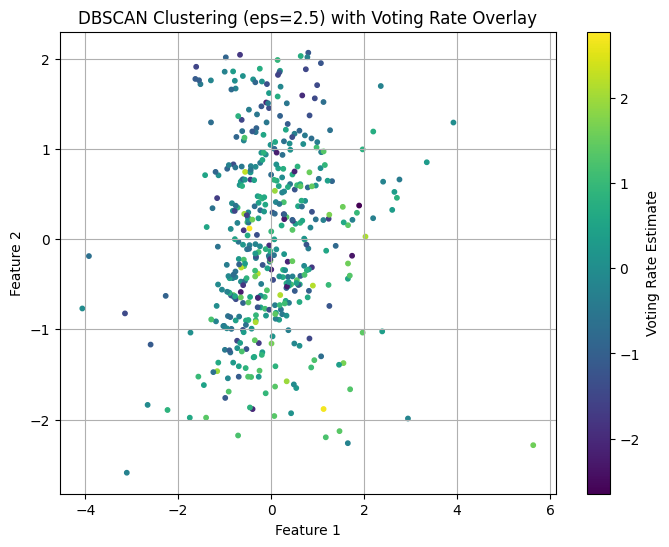

In [ ]:
dbscan = DBSCAN(eps=2.5, min_samples=15)
dbscan_labels = dbscan.fit_predict(numerical_data)

# Overlay voting rate estimate on DBSCAN clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    numerical_data.iloc[:, 0],
    numerical_data.iloc[:, 1],
    c=merged_standard_log_df['voting_rate_estimate'],  # Overlay voting rate estimate
    cmap='viridis',  # Use a diverging colormap for better visibility
    s=10
)
plt.colorbar(scatter, label='Voting Rate Estimate')
plt.title("DBSCAN Clustering (eps=2.5) with Voting Rate Overlay")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## DBSCAN Plotted with Voting Rate and Key Features

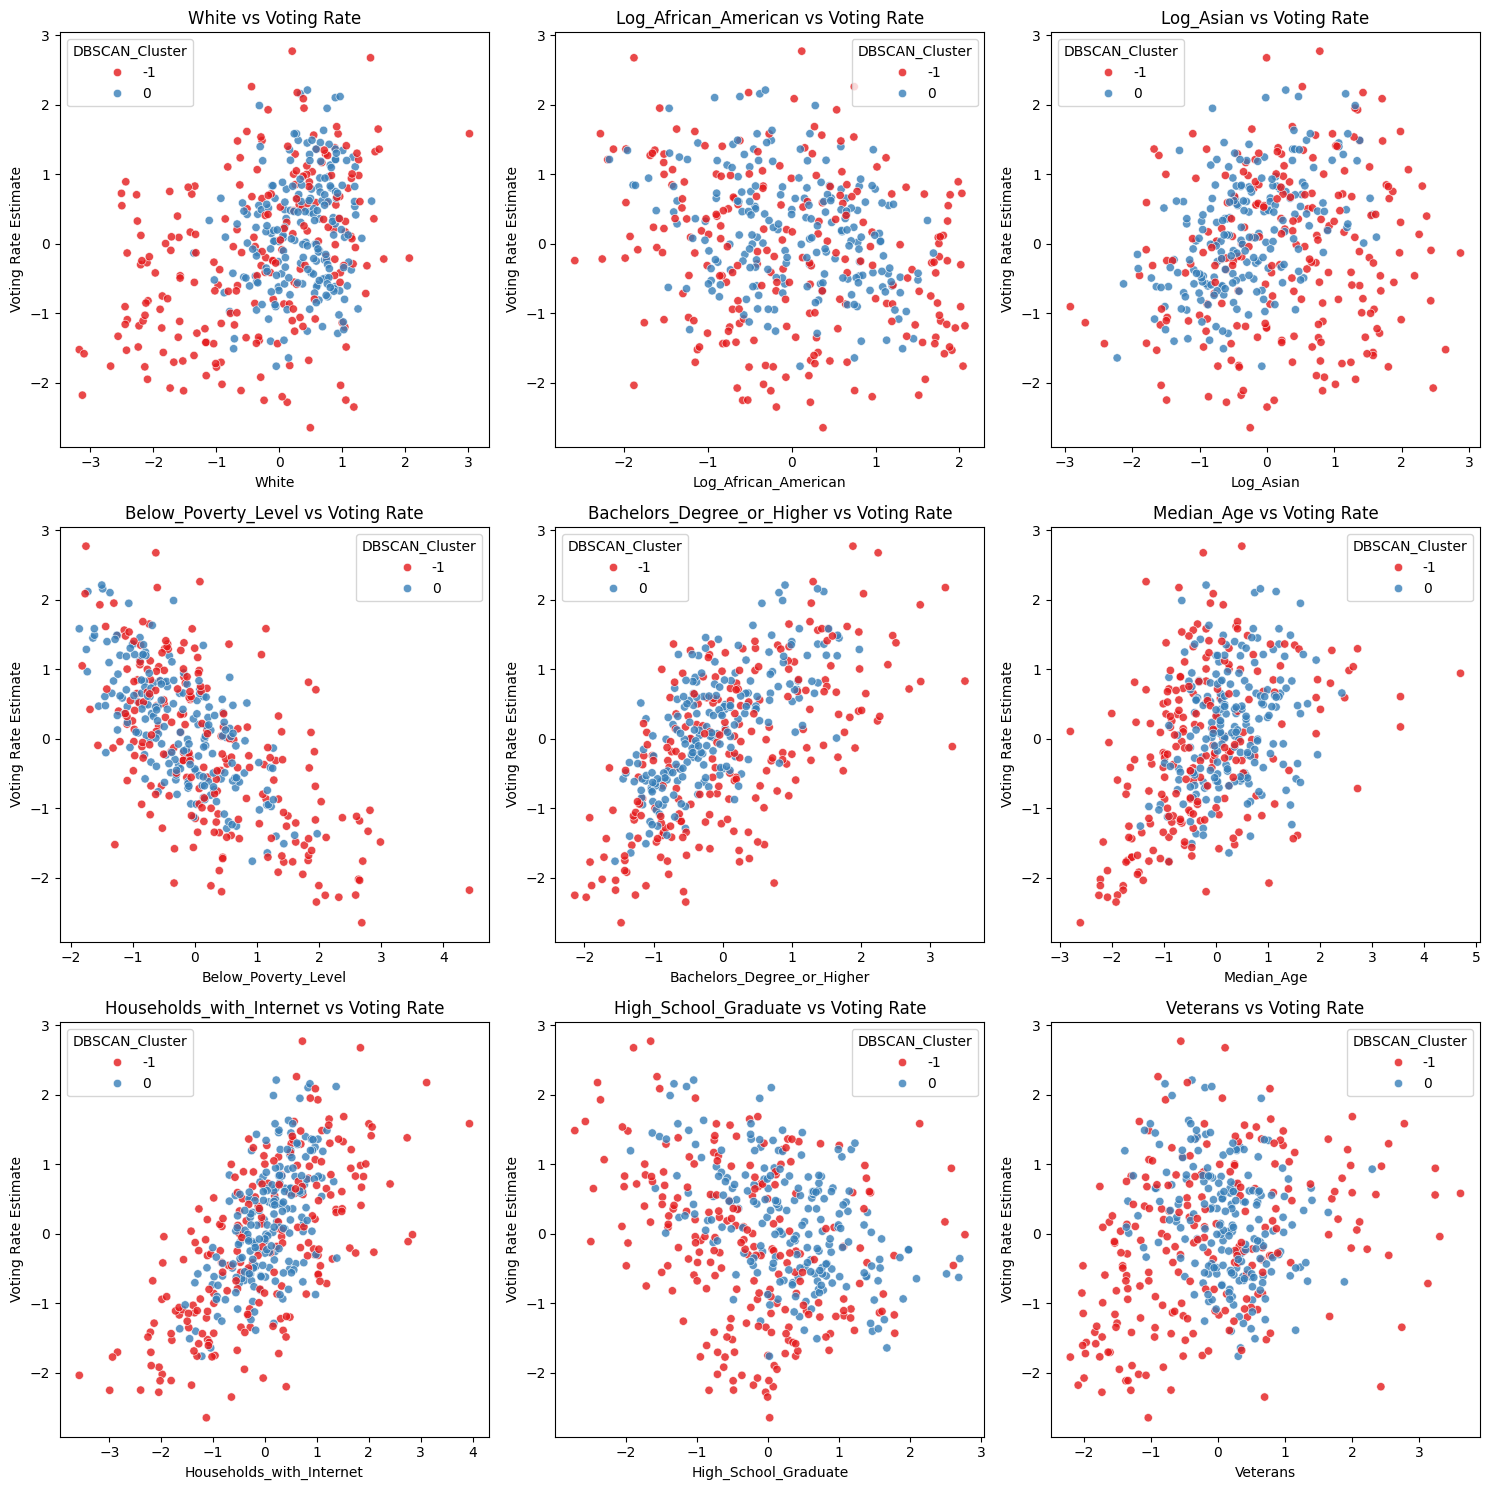

In [ ]:
# Assuming we have numerical_data and merged_standard_log_df loaded with the necessary data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Features to plot against voting_rate_estimate
features = [
  'White', 'Log_African_American', 'Log_Asian', 'Below_Poverty_Level',
    'Bachelors_Degree_or_Higher', 'Median_Age', 'Households_with_Internet', 'High_School_Graduate', 'Veterans'
]



# Apply DBSCAN with eps=2.5 and assign cluster labels
dbscan = DBSCAN(eps=2.5, min_samples=15)
dbscan_labels = dbscan.fit_predict(numerical_data)

# Add the DBSCAN cluster labels to the DataFrame
merged_standard_log_df['DBSCAN_Cluster'] = dbscan_labels

# Number of rows and columns for subplots
ncols = 3
nrows = (len(features) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes for easier iteration

# Generate scatter plots for each feature against voting_rate_estimate
for ax, feature in zip(axes, features):
    sns.scatterplot(
        x=feature,
        y='voting_rate_estimate',  # Voting rate on the y-axis
        hue='DBSCAN_Cluster',  # Color by DBSCAN cluster labels
        data=merged_standard_log_df,
        palette='Set1',
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"{feature} vs Voting Rate")
    ax.set_xlabel(feature)
    ax.set_ylabel("Voting Rate Estimate")

# Turn off any unused subplots
for ax in axes[len(features):]:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

When plotting important features with voting rate, and labeling with clusters, it similarly does not show any actionable information, with a mixed distribution of clusters spread through distribution.
DBSCAN was not the best suited method for this type of data. 

DBSCAN groups data together based on density- if the density of points are all uniformly distributed, it is very difficult for DBSCAN to make any distinctions between groups. This may have occurred with Voting Rate, with this feature having more of a gradual transition across the data, as opposed to distinct clusters that DBSCAN assumes. 


# Hierarchical Clustering

OPTIMAL PARAMETER = 2
MAXIMUM SILHOUETTE SCORE = 0.15594044121346587


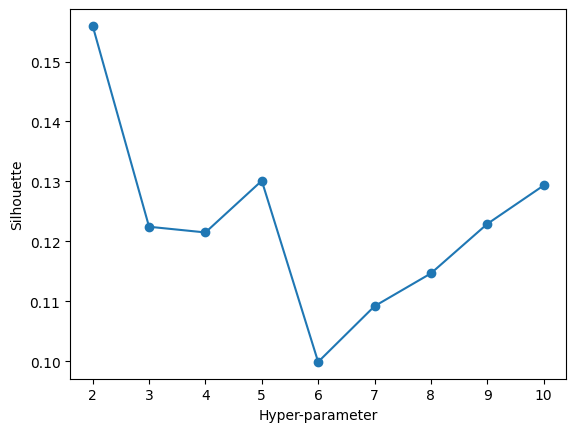

In [ ]:
opt_labels_agglomerative = maximize_silhouette1(
    numerical_data, algo="ag", nmax=10, i_plot=True
)
merged_standard_log_df['Hierarchical_Cluster'] = opt_labels_agglomerative

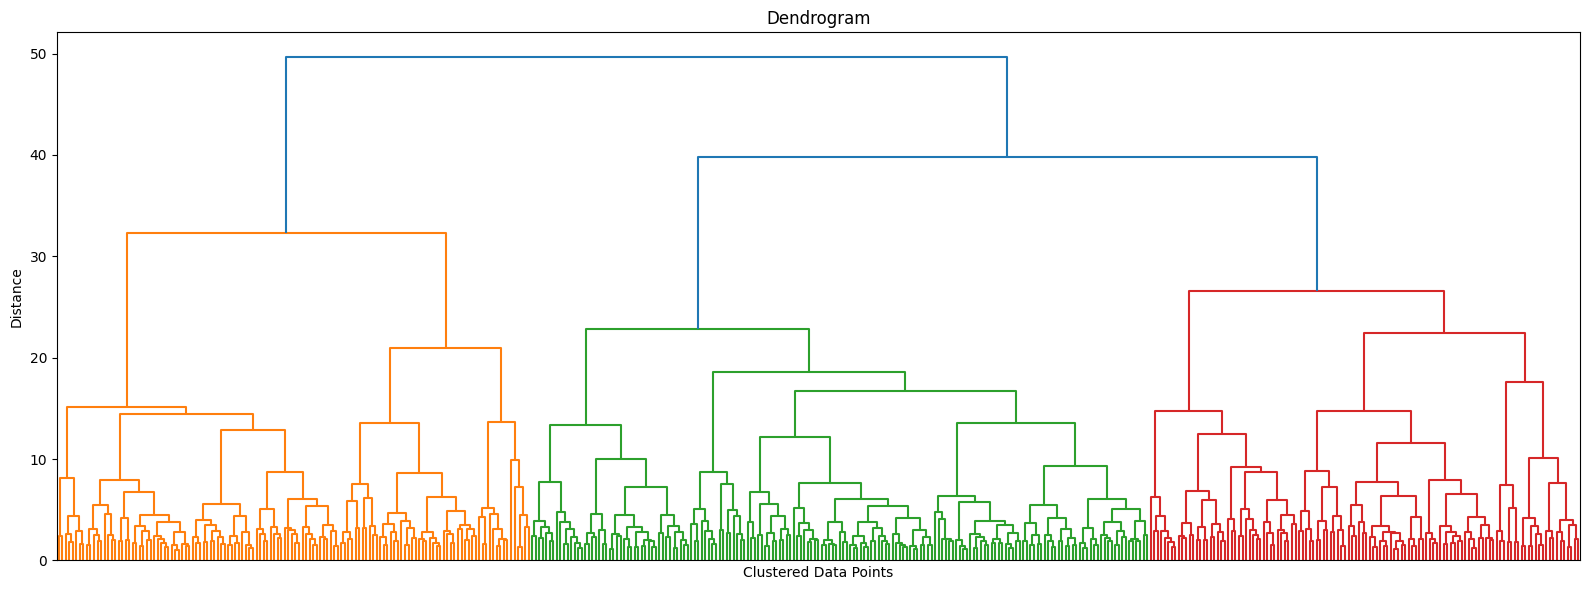

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Use District_Name from merged_standard_log_df as labels
labels = merged_standard_log_df['District_Name']  # Pull labels from the correct DataFrame

# TOO BIG

# Generate the linkage matrix using numerical columns only
Z = linkage(numerical_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(16, 6))
dendrogram(
    Z,
    no_labels=True,  # Remove labels
)
plt.title("Dendrogram")
plt.xlabel("Clustered Data Points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Analyzing Hierarchical Clustering, our hyperparameter testing told us that cutting the dendrogram at k = 2 would give us the highest silhouette score, and most optimal clustering. 


After grouping the data points into the cluster it belongs to and plotting against ‘voting rate estimate’, we are able to see that cluster 1 has a significantly higher voting rate average than cluster 2. 
## Voting Rate by Hierarchical Clusters

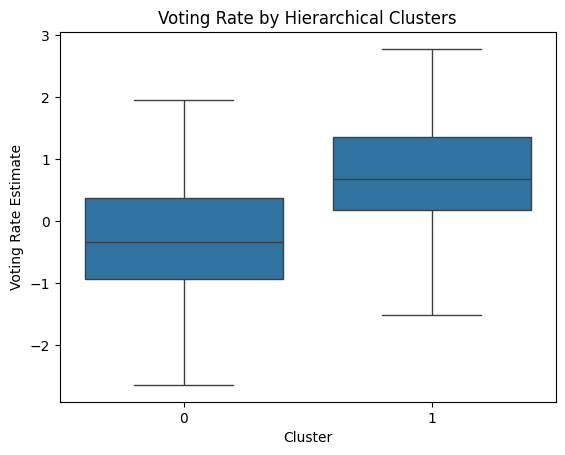

In [ ]:
import seaborn as sns

# Box plot for voting_rate_estimate by cluster
sns.boxplot(x='Hierarchical_Cluster', y='voting_rate_estimate', data=merged_standard_log_df)
plt.title("Voting Rate by Hierarchical Clusters")
plt.xlabel("Cluster")
plt.ylabel("Voting Rate Estimate")
plt.show()

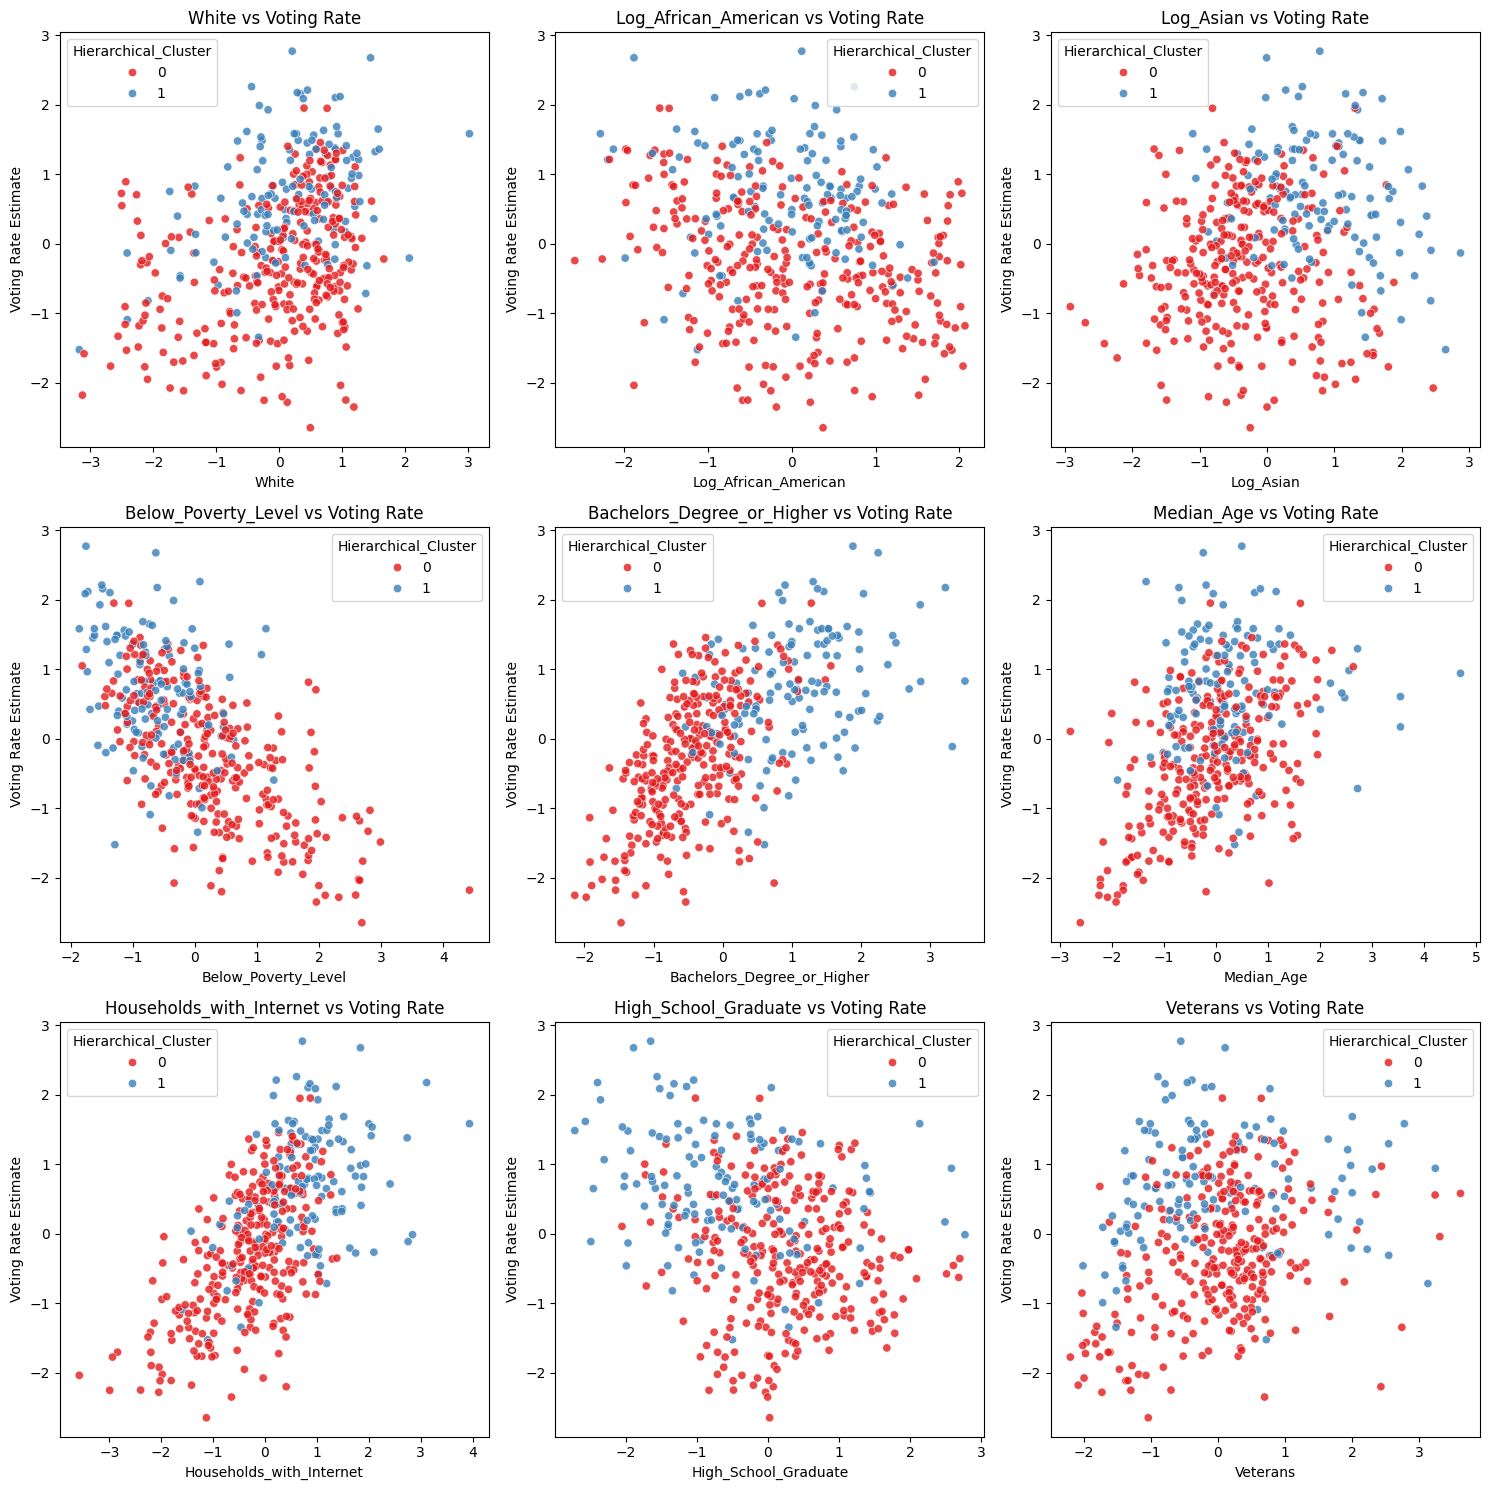

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with hierarchical cluster coloring
# Scatter plot for multiple pairs of features with hierarchical cluster coloring
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features = [
  'White', 'Log_African_American', 'Log_Asian', 'Below_Poverty_Level',
    'Bachelors_Degree_or_Higher', 'Median_Age', 'Households_with_Internet', 'High_School_Graduate', 'Veterans'
]


# Number of rows and columns for subplots
ncols = 3
nrows = (len(features) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()  # Flatten axes for easier iteration

# Generate scatter plots for each feature against voting_rate_estimate
for ax, feature in zip(axes, features):
    sns.scatterplot(
        x=feature,
        y='voting_rate_estimate',  # Voting rate on the y-axis
        hue='Hierarchical_Cluster',  # Color by cluster labels
        data=merged_standard_log_df,
        palette='Set1',
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"{feature} vs Voting Rate")
    ax.set_xlabel(feature)
    ax.set_ylabel("Voting Rate Estimate")

# Turn off any unused subplots
for ax in axes[len(features):]:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

When plotting important features with Voting Rate and assigning cluster labels, we see a similar pattern emerge as K-means, but not as distinct. White, African American, and Median Age had no clear correlation, however Bachelors Degree or Higher and Asian had higher coting rate for the higher values, and Below Poverty Level had lower rates of voting for higher values of poverty level. The features with no clear correlation may be due to the fact they contribute smaller variance to the clustering method, or truly have no correlation to voting rates. 


# **Comparing the Results**

---

## **K-Means Clustering**  
- **Clusters**: Produced **2 clear clusters**:  
  - **Cluster 0**: Aligned with **higher voting rates**.  
  - **Cluster 1**: Aligned with **lower voting rates**.  
- **Key Insights**:  
  - Higher voting rates are associated with:  
    - **White** and **Asian** populations  
    - **Median Age**  
    - **Bachelor's Degree** attainment  
  - Lower voting rates are associated with:  
    - **African American** population  
    - **Below Poverty Level**  
- **Summary**: K-Means effectively captured strong correlations between clusters and features, proving to be an **optimal choice** for uncovering relationships in the data.  

---

## **DBSCAN Clustering**  
- **Optimal EPS**:  
  - At **EPS = 5**: 1 large cluster, with **1 data point labeled as noise**.  
  - At **EPS = 2.5**: Clear group separation, but **no actionable patterns or insights** emerged.  
- **Summary**: DBSCAN did not produce meaningful or valuable information for this dataset.  

---

## **Hierarchical Clustering**  
- **Clusters**: Produced **2 clusters**:  
  - **Cluster 1**: Higher voting rates.  
  - **Cluster 2**: Lower voting rates.  
- **Key Observations**:  
  - Similar to K-Means, there was a clear cluster separation.  
  - Results were **less distinct**, with mixed cluster label distributions across many features.  
- **Summary**: While hierarchical clustering highlighted general patterns, it was **less effective** than K-Means.  

---

## **Best Algorithm**  
- The **best clustering algorithm** for this dataset was **K-Means**, followed by hierarchical clustering.  
- **Why K-Means?**  
  - Produced the **most distinct and clear insights** into relationships between features and voting rates.  
  - Likely due to the **linear relationships** in the data, which K-Means efficiently uncovers.  

---

## **Real World Impact**  
Utilizing the findings from **K-Means**, we uncovered hidden patterns between voting rates and socioeconomic groups:  

1. **Lower Education → Lower Voting Rates**  
   - **Actionable Insight**: Implement targeted **voter education programs** in communities with lower education levels, emphasizing the importance of civic participation.  

2. **Higher Poverty Levels → Lower Voting Rates**  
   - **Actionable Insight**: Address socioeconomic barriers:  
     - Implement **paid time off for voting** for individuals in poverty, ensuring they have the flexibility to vote.  
     - Develop **childcare support** and **transportation programs** for families and individuals in need on election day.  

By leveraging these insights, policymakers and stakeholders can design targeted initiatives to **increase voter participation** and foster a more inclusive democracy.  